In [87]:
import torch
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_dim = 2

x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1], [-1,-1], [1,-1], [-1,1]], shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[[1,1], [-1,-1], [1,-1], [-1,1]], shuffle=True, cluster_std=0.3)

In [88]:
# y의 배열에 from 인덱스를 to 값으로 덮어쓴다.
def label_map(y_, from_, to_):
    y = np.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train  = label_map(y_train, [0,1], 0)
y_train  = label_map(y_train, [2,3], 1)
y_test  = label_map(y_test, [0,1], 0)
y_test  = label_map(y_test, [2,3], 1)

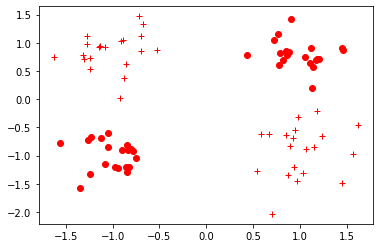

In [89]:
def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*', markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [90]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [91]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)

        return output

In [92]:
model = NeuralNet(2, 5)
learning_rate = 0.03
criterion = torch.nn.BCELoss() # 이진 교차 엔트로피
epochs = 2000 # 전체 학습 데이터를 몇번 모델에 입력하는가?

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

model.eval()

test_loss_before = criterion(model(x_test).squeeze(), y_test)
print('Before Training, test loss is {}'.format(test_loss_before.item()))


Before Training, test loss is 0.696296215057373


In [94]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)

    if(epoch % 100 == 0):
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
    
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.7016232013702393
Train loss at 100 is 0.648664116859436
Train loss at 200 is 0.6106882095336914
Train loss at 300 is 0.5696110725402832
Train loss at 400 is 0.5159350037574768
Train loss at 500 is 0.4500766396522522
Train loss at 600 is 0.3828430771827698
Train loss at 700 is 0.3265109062194824
Train loss at 800 is 0.28041738271713257
Train loss at 900 is 0.24492856860160828
Train loss at 1000 is 0.21707412600517273
Train loss at 1100 is 0.19436661899089813
Train loss at 1200 is 0.17569532990455627
Train loss at 1300 is 0.16064850986003876
Train loss at 1400 is 0.14779920876026154
Train loss at 1500 is 0.13671450316905975
Train loss at 1600 is 0.12709368765354156
Train loss at 1700 is 0.1187453642487526
Train loss at 1800 is 0.11171259731054306
Train loss at 1900 is 0.10548803955316544


In [97]:
model.eval()

test_loss = criterion(torch.squeeze(model(x_test)), y_test)
print('After training: test loss is {}'.format(test_loss.item()))

After training: test loss is 0.05141439288854599
